# Assignment 1
#### December 2nd 2021
In this Practical Assignment you will first simulate a New Keynesian model with no shocks and no state variables. Then you will calculate the minimum state variable (MSV) solution of this model, which - for this case - consists of constants and coincides with the model’s steady state.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [3]:
# parameter specifications
sigma= 2
kappa=0.3
beta=0.99
phi_1=1.5
phi_2=0.2

# initialize arrays for results
N = 1000

Y = np.zeros(N)
EY = np.zeros(N)
pi = np.zeros(N)
Epi = np.zeros(N)
i = np.zeros(N)

# 1
Y[0] = 0.1
pi[0] = 0.02

for t in range(1,N):
    EY[t] = Y[t-1]
    Epi[t] = pi[t-1]

    i[t] = phi_1*Epi[t] + phi_2*EY[t]
    Y[t] = EY[t] - 1/sigma * (i[t]- Epi[t])
    pi[t] = beta*Epi[t] + kappa*Y[t]

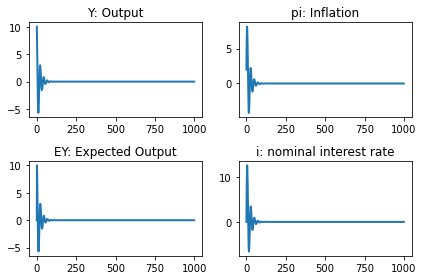

In [37]:
# 2

plt.subplot(2,2,1)
plt.plot([Y[t]*100 for t in range(N)], linewidth = 2)
plt.title('Y: Output')

plt.subplot(2,2,2)
plt.plot([pi[t]*100 for t in range(N)], linewidth = 2)
plt.title('pi: Inflation')

plt.subplot(2,2,3)
plt.plot([EY[t]*100 for t in range(N)], linewidth = 2)
plt.title('EY: Expected Output')

plt.subplot(2,2,4)
plt.plot([i[t]*100 for t in range(N)], linewidth = 2)
plt.title('i: nominal interest rate')

plt.tight_layout()

In [29]:
# 3
A = np.array([[1, 0, 1/sigma], 
                [-kappa, 1, 0],
                [0, 0, 1]])
A_inv = np.linalg.inv(A)
A_inv

array([[ 1.  ,  0.  , -0.5 ],
       [ 0.3 ,  1.  , -0.15],
       [ 0.  ,  0.  ,  1.  ]])

In [12]:
# 4
def func4(expec_vec):
    B = np.zeros(len(expec_vec))
    expY, expPi, expi = expec_vec
    
    B[0] = expY + 1/sigma * expPi
    B[1] = beta * expPi
    B[2] = phi_1 * expPi + phi_2 * expY
    
    z = np.dot(A_inv,B)
    return z


func4([Y[N-1], pi[N-1], i[N-1]])

array([-7.01299463e-27,  5.89772773e-27,  1.10142577e-26])

In [41]:
def func7(expec_vec):
    B = np.zeros(len(expec_vec))
    expY, expPi, expi = expec_vec
    
    B[0] = expY + 1/sigma * expPi
    B[1] = beta * expPi
    B[2] = phi_1 * expPi + phi_2 * expY
    
    z = np.dot(A_inv,B)
    diff = z - np.array(expec_vec)
    
    return diff

func7([Y[N-1], pi[N-1], i[N-1]])



array([0., 0., 0.])

In [35]:
# 8

init = [0,0,1]

[coefficients, inf, ier, msg] = fsolve(func7, init, full_output = True)

coefficients


array([5.e-324, 0.e+000, 0.e+000])